# Preparing the data frame.

## Hate Speech Filipino Dataset (source 1).

### Load the dataset.

In [1]:
# Load the datasets from the local csv files.
# Datasets are from Hugging Face (ref: https://huggingface.co/datasets/hate_speech_filipino)

import pandas as pd

local_sub_path = 'datasets/Hate Speech Filipino/'

hate_speech_fil_train_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_test_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_validate_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_validate.csv')

# Combine all the datasets into a single data frame.
hate_speech_fil_df = pd.concat([hate_speech_fil_test_df, hate_speech_fil_train_df, hate_speech_fil_validate_df])

# Reset the index of hate_speech_fil_df.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

### Inspect the dataset.

In [2]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [3]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [4]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [5]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
24227,Walang katumbas na halaga ng pera ang BOTO at ...,0
24228,Mar Roxas says presidential race is now only b...,0
24229,Ms Miriam to withdraw presidency to give away ...,0
24230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [6]:
# Check the basic information of the data frame.
hate_speech_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24232 non-null  object
 1   label   24232 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.8+ KB


### Clean the dataset.

In [7]:
# Check for null values.
hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
# Check for duplicates.
hate_speech_fil_df.duplicated().sum()

10356

In [9]:
# Show the duplicates.
hate_speech_fil_df[hate_speech_fil_df.duplicated()]


,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
24013,#OnlyBinayUNAsaIlocos,0
24029,#onlybinay,0
24042,#PHvote,0
24158,#PiliPinasDebates2016,1


In [10]:
# Drop the duplicates.
hate_speech_fil_df.drop_duplicates(inplace=True)

# Reset the index.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

In [11]:
# Verify that there are no duplicates.
hate_speech_fil_df.duplicated().sum()

0

In [12]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
13871,Walang katumbas na halaga ng pera ang BOTO at ...,0
13872,Mar Roxas says presidential race is now only b...,0
13873,Ms Miriam to withdraw presidency to give away ...,0
13874,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


## Toxic Tweets Dataset (source 2).

### Load the dataset.

In [13]:
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset)

local_sub_path = 'datasets/Toxic Tweets/'

raw_toxic_tweets_df = pd.read_csv(local_sub_path + 'FinalBalancedDataset.csv')

### Inspect the dataset.

In [14]:
raw_toxic_tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [15]:
# Check the basic information of the data frame.
raw_toxic_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [16]:
# Check for null values.
raw_toxic_tweets_df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [17]:
# Check for duplicates.
raw_toxic_tweets_df.duplicated().sum()

0

### Restructure the data frame.

In [18]:
# The data frame should have only a text and label features.

toxic_tweets_df = raw_toxic_tweets_df.copy()
toxic_tweets_df.rename(columns={'tweet': 'text', 'Toxicity': 'label'}, inplace=True)
toxic_tweets_df = toxic_tweets_df[['text', 'label']]

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [19]:
# Check for duplicates.
toxic_tweets_df.duplicated().sum()

2432

In [20]:
# Show the duplicates.
toxic_tweets_df[toxic_tweets_df.duplicated()]

,text,label
46,#model i love u take with u all the time in ...,0
96,#model i love u take with u all the time in ...,0
117,#model i love u take with u all the time in ...,0
162,#model i love u take with u all the time in ...,0
218,#model i love u take with u all the time in ...,0
...,...,...
31886,100 amazing health benefits of cucumbers! #...,0
31904,#model i love u take with u all the time in ...,0
31930,@user #feminismiscancer #feminismisterrorism #...,1
31951,i've just posted a new blog: #secondlife #lone...,0


In [21]:
# Drop the duplicates.
toxic_tweets_df.drop_duplicates(inplace=True)

# Reset the index.
toxic_tweets_df.reset_index(drop=True, inplace=True)

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


In [22]:
# Verify that there are no duplicates.
toxic_tweets_df.duplicated().sum()

0

## Hate Speech and Offensive Language Dataset (source 3)

### Load the dataset.

In [23]:
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)

local_sub_path = 'datasets/Hate Speech and Offensive Language/'

raw_hs_and_offensive_lang_df = pd.read_csv(local_sub_path + 'labeled_data.csv')

### Inspect the dataset.

In [24]:
raw_hs_and_offensive_lang_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [25]:
# Check the basic information of the data frame.
raw_hs_and_offensive_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [26]:
# Check for null values.
raw_hs_and_offensive_lang_df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [27]:
# Check for duplicates.
raw_hs_and_offensive_lang_df.duplicated().sum()

0

### Restructure the data frame.

In [28]:
# The data frame should have only a text and label features.

hs_and_offensive_lang_df = raw_hs_and_offensive_lang_df.copy()
hs_and_offensive_lang_df = hs_and_offensive_lang_df[['tweet', 'class']]
hs_and_offensive_lang_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

# The original labels are 0, 1, and 2. They each means 'hate speech', 'offensive language', and 'neither' respectively.
# The original labels 0 and 1 will be mapped to 1 (means toxic) and 2 will be mapped to 0 (means non-toxic)
mapping = {0: 1, 1: 1, 2: 0}
hs_and_offensive_lang_df['label'] = hs_and_offensive_lang_df['label'].map(mapping)

hs_and_offensive_lang_df


,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [29]:
# Check for duplicates.
hs_and_offensive_lang_df.duplicated().sum()

0

## Combine the different data frames.

In [30]:
# Make a single data frame for all the datasets.
df = pd.concat([hate_speech_fil_df, toxic_tweets_df, hs_and_offensive_lang_df], ignore_index=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92968,"you've gone and broke the wrong heart baby, an...",0
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


### Clean the data.

After countless experiments, removing the substrings that starts with @, http, and, https reduces the accuracy rate on sufficiently large data sets. For now, we will comment this subsequent code out.

In [31]:
# Remove the substrings that starts with @, http, and https.
# The are irrelevant to the classification.

import re

for index, row in df.iterrows():
    df.loc[index, 'text'] = re.sub(r'@\S+', '', df.loc[index, 'text'])
    df.loc[index, 'text'] = re.sub(r'http\S+', '', df.loc[index, 'text'])
    df.loc[index, 'text'] = re.sub(r'https\S+', '', df.loc[index, 'text'])

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
92967,you's a muthaf***in lie &#8220; right! His T...,1
92968,"you've gone and broke the wrong heart baby, an...",0
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


In [32]:
# Check for duplicates.
df.duplicated().sum()

23993

In [33]:
# Show the duplicates.
df[df.duplicated()]

,text,label
568,bakit si roxas ayaw pumunta? di lang kasi boo ...,1
572,,0
604,bakit si roxas ayaw pumunta? di lang kasi boo ...,1
606,,0
781,bakit si roxas ayaw pumunta? di lang kasi boo ...,1
...,...,...
92966,you're such a retard i hope you get type 2 dia...,1
92967,you's a muthaf***in lie &#8220; right! His T...,1
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


In [34]:
# Drop the duplicates.
df.drop_duplicates(inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
68974,when baylor wins im talking so much trash,0
68975,who's downie like a brownie 4 brunch? Need mim...,0
68976,yea so about 's new friend.. all my friends k...,0
68977,"you know what they say, the early bird gets th...",0


In [35]:
# Verify that there are no duplicates.
df.duplicated().sum()

0

In [36]:
# Check for texts that only contain number strings.
df[df['text'].str.isnumeric()]

,text,label


In [37]:
# Check for empty strings.
df[df['text'] == '']

,text,label
523,,0
3491,,1


In [38]:
# Remove the rows with empty strings.
df.drop(df[df['text'] == ''].index, inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
68972,when baylor wins im talking so much trash,0
68973,who's downie like a brownie 4 brunch? Need mim...,0
68974,yea so about 's new friend.. all my friends k...,0
68975,"you know what they say, the early bird gets th...",0


In [39]:
# Verify that there are no empty strings.
df[df['text'] == '']

,text,label


## Creating a Train and Test sets

In [40]:
X = df['text']
y = df['label']

print(X.shape)
print(y.shape)

(68977,)
(68977,)


In [41]:
# Split X and y into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51732,)
(17245,)
(51732,)
(17245,)


## Vectorizing the dataset

In [42]:
# Instantiate the CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

In [43]:
# Learn the training data vocabulary, then use it to create a document-term matrix.

cvect.fit(X_train)

CountVectorizer()

In [44]:
# Examine the fitted vocabulary.

feature_names = cvect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)


['00' '000' '000001' ... 'ó¾' 'øª' 'ø¹ù']
len: 53386


,0
0,00
1,000
2,000001
3,000php
4,001
...,...
53381,ð¾ñ
53382,ña
53383,ó¾
53384,øª


In [45]:
# Transform the training data into a document-term matrix.

# X_train_dtm = vect.transform(X_train)
X_train_dtm = cvect.fit_transform(X_train)

In [46]:
# Examine the document-term matrix.

X_train_dtm

<51732x53386 sparse matrix of type '<class 'numpy.int64'>'
	with 607190 stored elements in Compressed Sparse Row format>

In [47]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.

X_test_dtm = cvect.transform(X_test)
X_test_dtm

<17245x53386 sparse matrix of type '<class 'numpy.int64'>'
	with 192300 stored elements in Compressed Sparse Row format>

# Building and Evaluating the model

## Building the model.

In [48]:
# Import and instantiate a Multinomial Naive Bayes model.

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [49]:
# Train the model using X_train_dtm and the fit() method.

mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the model

In [50]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.

y_pred_class = mnb.predict(X_test_dtm)

In [51]:
# Calculate the accuracy of the predictions.

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.8607132502174544

array([[8063, 1603],
       [ 799, 6780]], dtype=int64)

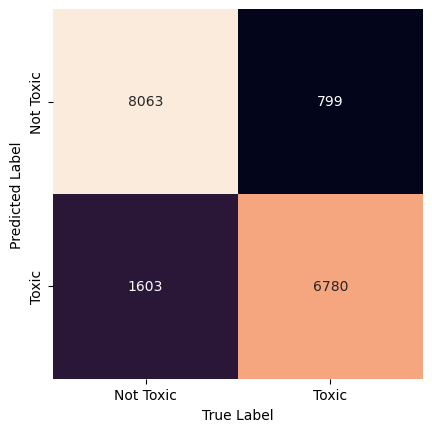

In [52]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [53]:
# Print the classification report.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      9666
           1       0.81      0.89      0.85      7579

    accuracy                           0.86     17245
   macro avg       0.86      0.86      0.86     17245
weighted avg       0.87      0.86      0.86     17245



In [54]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([4.21570901e-04, 9.37615101e-04, 1.86826744e-03, ...,
       1.01394614e-04, 9.86391134e-01, 8.36233618e-01])

In [55]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})
test_results_df


,text,actual,predicted,prob
35409,- do what makes you ...â - be with who m...,0,0,0.000422
14636,do what makes you ...be with who makes you #s...,0,0,0.000938
57918,RT Today in 1996 Charlie Wilson left office. ...,0,0,0.001868
10535,Binay convoy rolling now. Spoke too soon. Otw ...,0,0,0.001270
9046,"From 1 - Binay's ""Yes, of course!""\n\nGaano ka...",1,1,0.984248
...,...,...,...,...
1173,ang ganda ng bagong campaign ad ni Binay. naka...,1,1,1.000000
51334,Can't neva be a sucka for no bitch.. That ain'...,1,1,0.999998
21295,it's plain to see romney misses the news limel...,0,0,0.000101
6919,Pag nanalo si Mar Roxas nandaya yan.,1,1,0.986391


# Hypertuning the parameters.

## Making a custom stop words.

In [56]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))


## Search for the optimal parameters.

In [75]:
# Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with CountVectorizer and MultinomialNB.
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create a dictionary of parameters to search.
params = {
    'cvec__stop_words': [custom_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [0.01, 0.1, 0.2, 0.3],
    'mnb__alpha': [0.01, 0.1, 1.0, 10.0],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# Fit GridSearch to training data.
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['call',
  'or',
  'there',
  'here',
  'who',
  'every',
  'pataas',
  'kailanman',
  'kaysa',
  'few',
  'interest',
  'anyhow',
  're',
  'tulad',
  'eleven',
  'has',
  'own',
  'in',
  'everyone',
  'too',
  'sixty',
  'ka',
  'whom',
  'gumawa',
  'anywhere',
  'kung',
  'makita',
  'against',
  'whole',
  'nagkaroon',
  'only',
  'within',
  'ibig',
  'ni',
  'eg',
  'niyang',
  'her',
  'they',
  'fill',
  'nasaan',
  'seems',
  'towards',
  'then',
  'ibabaw',
  'pala',
  'paano',
  'found',
  'somewhere',
  'our',
  'isang',
  'anumang',
  'kanyang',
  'sino',
  'no',
  'such',
  'bago',
  'us',
  'again',
  'o',
  'meanwhile',
  'huwag',
  'so',
  'two',
  'do',
  'from',
  'nga',
  'lamang',
  'un',
  'isa',
  'beyond',
  'for',
  'gagawin',
  'fifteen',
  'at',
  'go',
  'next',
  'under',
  'kulang',
  'kailangan',
  'pangalawa',
  'namin',
  'very',
  'katiyakan',
  'aking',
  'm

## Using the new parameters.

In [77]:
# Build a new model using the best parameters.

cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 2), max_df=0.2, min_df=2, lowercase=False, binary=True)
mnb = MultinomialNB(alpha=1.0)

# Vectorize the data.
X_train_dtm = cvect.fit_transform(X_train)
X_test_dtm = cvect.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm, y_train)
y_pred_class = mnb.predict(X_test_dtm)

# Check accuracy.
metrics.accuracy_score(y_test, y_pred_class)

0.8701652652942882

In [59]:
# # Split X and y into training and testing sets.
# X = df['text']
# y = df['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

# # Instantiate CountVectorizer.
# cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 25), max_df=0.3, min_df=1)

# # Transform the training data into a document-term matrix.
# X_train_dtm = cvect.fit_transform(X_train)

# # Transform the testing data (using fitted vocabulary) into a document-term matrix.
# X_test_dtm = cvect.transform(X_test)

# # Import and instantiate a Multinomial Naive Bayes model.
# mnb = MultinomialNB(alpha=1.0)

# # Train the model using X_train_dtm and the fit() method.
# mnb.fit(X_train_dtm, y_train)

# # Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
# y_pred_class = mnb.predict(X_test_dtm)

# # Calculate the accuracy of the predictions.
# metrics.accuracy_score(y_test, y_pred_class)